In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper

import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite

engine = create_engine("sqlite:///Data/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
# reflect the tables

base = automap_base()
base.prepare(engine, reflect = True)

In [6]:
# View all of the classes that automap found

base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table

measurement = base.classes.measurement
station = base.classes.station

In [8]:
# Create our session (link) from Python to the DB

session = Session(engine)

In [9]:
#Create the inspector and connect it to the engine

inspector = inspect(engine)

# Exploratory Precipitation Analysis

In [10]:
columns = inspector.get_columns('measurement')
for column in columns: 
        print(column['name'], column['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [11]:
engine.execute('SELECT * FROM measurement LIMIT 10').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0),
 (6, 'USC00519397', '2010-01-07', 0.06, 70.0),
 (7, 'USC00519397', '2010-01-08', 0.0, 64.0),
 (8, 'USC00519397', '2010-01-09', 0.0, 68.0),
 (9, 'USC00519397', '2010-01-10', 0.0, 73.0),
 (10, 'USC00519397', '2010-01-11', 0.01, 64.0)]

In [12]:
# Find the most recent date in the data set.

most_recent_date = session.query(measurement.date).order_by(measurement.date.desc()).first()
print(f"Most Recent Date: {most_recent_date[0]}")

Most Recent Date: 2017-08-23


In [13]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.

one_year_prior_date = dt.date(2017, 8, 23) - dt.timedelta(days = 365)
print('One Year Prior to Most Recent Date:', one_year_prior_date)

One Year Prior to Most Recent Date: 2016-08-23


In [14]:
# Perform a query to retrieve the data and precipitation scores

year_precipitation_data = (session.query(measurement.date,func.max(measurement.prcp))
                  .filter(func.strftime('%Y-%m-%d',measurement.date) > one_year_prior_date)
                  .group_by(measurement.date)
                  .all())

year_precipitation_data

[('2016-08-24', 2.28),
 ('2016-08-25', 0.21),
 ('2016-08-26', 0.04),
 ('2016-08-27', 0.18),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.9),
 ('2016-08-30', 0.05),
 ('2016-08-31', 2.46),
 ('2016-09-01', 0.02),
 ('2016-09-02', 0.19),
 ('2016-09-03', 1.0),
 ('2016-09-04', 0.74),
 ('2016-09-05', 0.18),
 ('2016-09-06', 1.0),
 ('2016-09-07', 1.35),
 ('2016-09-08', 0.22),
 ('2016-09-09', 0.35),
 ('2016-09-10', 1.16),
 ('2016-09-11', 0.6),
 ('2016-09-12', 1.04),
 ('2016-09-13', 1.2),
 ('2016-09-14', 6.7),
 ('2016-09-15', 3.35),
 ('2016-09-16', 0.61),
 ('2016-09-17', 0.36),
 ('2016-09-18', 0.42),
 ('2016-09-19', 0.25),
 ('2016-09-20', 0.43),
 ('2016-09-21', 1.02),
 ('2016-09-22', 0.75),
 ('2016-09-23', 0.94),
 ('2016-09-24', 0.27),
 ('2016-09-25', 0.04),
 ('2016-09-26', 1.02),
 ('2016-09-27', 1.0),
 ('2016-09-28', 0.08),
 ('2016-09-29', 1.49),
 ('2016-09-30', 0.38),
 ('2016-10-01', 1.02),
 ('2016-10-02', 0.61),
 ('2016-10-03', 0.46),
 ('2016-10-04', 3.46),
 ('2016-10-05', 0.81),
 ('2016-10-06', 0.

In [15]:
# Save the query results as a Pandas DataFrame and set the index to the date column

precipitation_df = pd.DataFrame(year_precipitation_data, columns = ['Date', 'Precipitation']).sort_values('Date')
precipitation_df.set_index('Date',inplace = True)
precipitation_df.head(10)

,Precipitation
Date,
2016-08-24,2.28
2016-08-25,0.21
2016-08-26,0.04
2016-08-27,0.18
2016-08-28,2.07
2016-08-29,0.90
2016-08-30,0.05
2016-08-31,2.46
2016-09-01,0.02


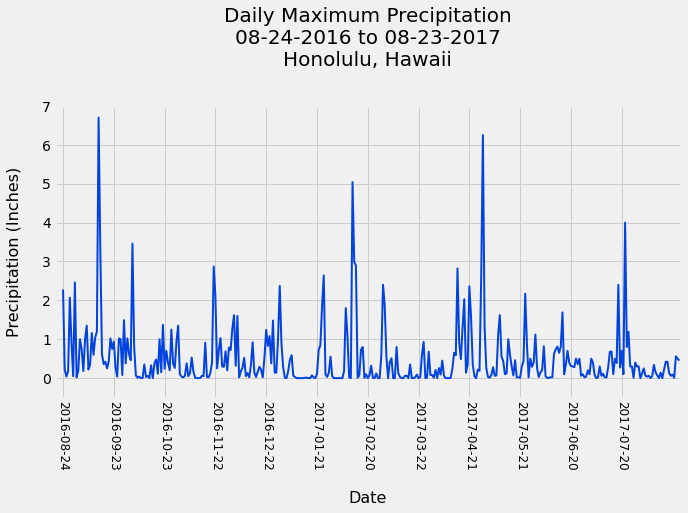

In [16]:
# Use Pandas Plotting with Matplotlib to plot the data
plt.rcParams['figure.figsize'] = (10,5)
precipitation_df.plot(linewidth = 2,alpha = 1,rot = 270, 
             xticks = (0,30,60,90,120,150,180,210,240,270,300,330,365),
             color = 'xkcd:blue')

plt.xlim(-5,365)
plt.ylim(-0.5,7)
plt.yticks(size = 14)
plt.xticks(fontsize = 12)
plt.legend('',frameon = False)
plt.xlabel('Date',fontsize=16,color = 'black',labelpad = 20)
plt.ylabel('Precipitation (Inches)',fontsize = 16,color = 'black',labelpad = 20)
plt.title('Daily Maximum Precipitation\n08-24-2016 to 08-23-2017\nHonolulu, Hawaii',fontsize = 20,pad = 40)

plt.show()

In [17]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precipitation_df.describe()

,Precipitation
count,365.000000
mean,0.517288
std,0.829196
min,0.000000
25%,0.040000
50%,0.250000
75%,0.650000
max,6.700000


# Exploratory Station Analysis

In [18]:
columns = inspector.get_columns('station')
for column in columns: 
        print(column['name'], column['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [19]:
engine.execute('SELECT * FROM station LIMIT 10').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

In [20]:
# Design a query to calculate the total number stations in the dataset
station_count = session.query(station).count() 
print(f'This dataset has {station_count} stations.')

This dataset has 9 stations.


In [21]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# Station Activity
# List the stations and the counts in descending order.

station_activity = (session.query(measurement.station,func.count(measurement.station))
                         .group_by(measurement.station)
                         .order_by(func.count(measurement.station).desc())
                         .all())
station_activity

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [22]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

sel = [measurement.station, 
      func.min(measurement.tobs), 
      func.max(measurement.tobs), 
      func.avg(measurement.tobs)]

most_active_station = (session.query(*sel)
                       .filter(measurement.station == 'USC00519281')
                       .all())

most_active_station_df = pd.DataFrame(most_active_station, columns = ['Station', 'Minimum Temperature',
                                                                      'Maximum Temperature', 'Average Temperature'])

most_active_station_df.set_index('Station', inplace = True)

most_active_station_df


,Minimum Temperature,Maximum Temperature,Average Temperature
Station,,,
USC00519281,54.0,85.0,71.663781


In [23]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

ytd_tobs = (session.query(measurement.date,(measurement.tobs))
                  .filter(func.strftime(measurement.date) > one_year_prior_date)
                  .filter(measurement.station == 'USC00519281')
                  .all())
ytd_tobs

[('2016-08-24', 77.0),
 ('2016-08-25', 80.0),
 ('2016-08-26', 80.0),
 ('2016-08-27', 75.0),
 ('2016-08-28', 73.0),
 ('2016-08-29', 78.0),
 ('2016-08-30', 77.0),
 ('2016-08-31', 78.0),
 ('2016-09-01', 80.0),
 ('2016-09-02', 80.0),
 ('2016-09-03', 78.0),
 ('2016-09-04', 78.0),
 ('2016-09-05', 78.0),
 ('2016-09-06', 73.0),
 ('2016-09-07', 74.0),
 ('2016-09-08', 80.0),
 ('2016-09-09', 79.0),
 ('2016-09-10', 77.0),
 ('2016-09-11', 80.0),
 ('2016-09-12', 76.0),
 ('2016-09-13', 79.0),
 ('2016-09-14', 75.0),
 ('2016-09-15', 79.0),
 ('2016-09-16', 78.0),
 ('2016-09-17', 79.0),
 ('2016-09-18', 78.0),
 ('2016-09-19', 78.0),
 ('2016-09-20', 76.0),
 ('2016-09-21', 74.0),
 ('2016-09-22', 77.0),
 ('2016-09-23', 78.0),
 ('2016-09-24', 79.0),
 ('2016-09-25', 79.0),
 ('2016-09-26', 77.0),
 ('2016-09-27', 80.0),
 ('2016-09-28', 78.0),
 ('2016-09-29', 78.0),
 ('2016-09-30', 78.0),
 ('2016-10-01', 77.0),
 ('2016-10-02', 79.0),
 ('2016-10-03', 79.0),
 ('2016-10-04', 79.0),
 ('2016-10-05', 79.0),
 ('2016-10-

In [24]:
# Save the query results as a Pandas DataFrame and set the index to the date column

ytd_tobs_df = pd.DataFrame(ytd_tobs, columns = ['Date', 'Temperature']).sort_values('Date')
ytd_tobs_df.set_index('Date',inplace = True)
ytd_tobs_df.head(10)

,Temperature
Date,
2016-08-24,77.0
2016-08-25,80.0
2016-08-26,80.0
2016-08-27,75.0
2016-08-28,73.0
2016-08-29,78.0
2016-08-30,77.0
2016-08-31,78.0
2016-09-01,80.0


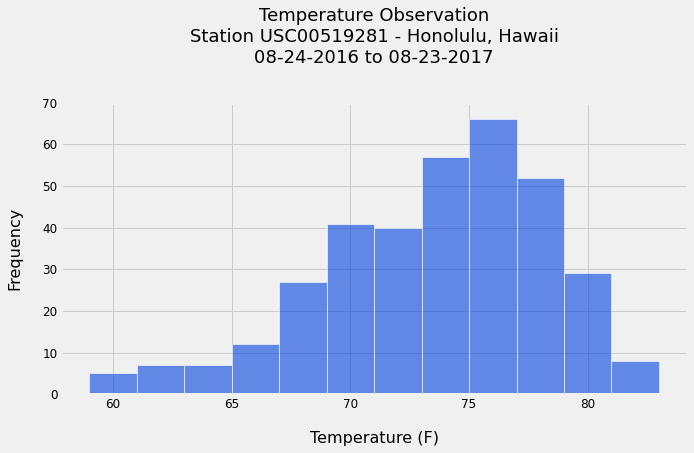

In [25]:
#Plot the results as a histogram with `bins=12`

plt.rcParams['figure.figsize'] = (10,5)
plt.hist(ytd_tobs_df['Temperature'],bins = 12,alpha = 0.6,edgecolor = 'xkcd:white',
         linewidth = 1,color = 'xkcd:blue')

plt.title('Temperature Observation\nStation USC00519281 - Honolulu, Hawaii\n08-24-2016 to 08-23-2017',fontsize = 18,pad = 40)
plt.xlabel('Temperature (F)',fontsize = 16,color = 'black',labelpad = 20)
plt.ylabel('Frequency',fontsize = 16,color = 'black',labelpad = 20)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.ylim(0,70)

plt.show()